In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1,pages+1):
    print(f"Scraping Page {i}")
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect html data from this page
    response =  requests.get(url)

    #parse the content
    content = response.content
    parsed_content = BeautifulSoup(content,'html.parser')
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping Page 1
   ---> 100 total reviews
Scraping Page 2
   ---> 200 total reviews
Scraping Page 3
   ---> 300 total reviews
Scraping Page 4
   ---> 400 total reviews
Scraping Page 5
   ---> 500 total reviews
Scraping Page 6
   ---> 600 total reviews
Scraping Page 7
   ---> 700 total reviews
Scraping Page 8
   ---> 800 total reviews
Scraping Page 9
   ---> 900 total reviews
Scraping Page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"]= reviews
df.head()

,reviews
0,✅ Trip Verified | I really like flying Briti...
1,✅ Trip Verified | Could not book online the ...
2,✅ Trip Verified | Having had some rough experi...
3,✅ Trip Verified | This comfortable flight wa...
4,✅ Trip Verified | Punta Cana Terminal B chec...


In [4]:
df

,reviews
0,✅ Trip Verified | I really like flying Briti...
1,✅ Trip Verified | Could not book online the ...
2,✅ Trip Verified | Having had some rough experi...
3,✅ Trip Verified | This comfortable flight wa...
4,✅ Trip Verified | Punta Cana Terminal B chec...
...,...
995,✅ Trip Verified | Phoenix to Tel Aviv via Lond...
996,Not Verified | London to Kefalonia . The T5 G...
997,✅ Trip Verified | London to Dublin. It was ne...
998,✅ Trip Verified | Hong Kong to London. An ema...


In [5]:
df.reviews = df.reviews.str.split("|", expand=True)[1]

In [6]:
df

,reviews
0,I really like flying British Airways partic...
1,Could not book online the night before beca...
2,Having had some rough experiences with BA in ...
3,This comfortable flight was BA at its best....
4,Punta Cana Terminal B check in was straight...
...,...
995,Phoenix to Tel Aviv via London. The return fr...
996,London to Kefalonia . The T5 Galleries loung...
997,London to Dublin. It was never my choice to ...
998,Hong Kong to London. An email on the 25th Au...


Step 1: Cleaning the text

In [7]:
import re 

#define  the function to clean the text
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df["Cleaned Reviews"] = df["reviews"].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I really like flying British Airways partic...,I really like flying British Airways particul...
1,Could not book online the night before beca...,Could not book online the night before becaus...
2,Having had some rough experiences with BA in ...,Having had some rough experiences with BA in ...
3,This comfortable flight was BA at its best....,This comfortable flight was BA at its best Ex...
4,Punta Cana Terminal B check in was straight...,Punta Cana Terminal B check in was straightfo...


Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries


In [8]:
import nltk
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict ={"J": wordnet.ADJ, "V": wordnet.VERB , "N": wordnet.NOUN, "R":wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I really like flying British Airways partic...,I really like flying British Airways particul...,"[(really, r), (like, None), (flying, v), (Brit..."
1,Could not book online the night before beca...,Could not book online the night before becaus...,"[(Could, None), (book, n), (online, v), (night..."
2,Having had some rough experiences with BA in ...,Having had some rough experiences with BA in ...,"[(rough, a), (experiences, n), (BA, n), (recen..."
3,This comfortable flight was BA at its best....,This comfortable flight was BA at its best Ex...,"[(comfortable, a), (flight, n), (BA, n), (best..."
4,Punta Cana Terminal B check in was straight...,Punta Cana Terminal B check in was straightfo...,"[(Punta, n), (Cana, n), (Terminal, n), (B, n),..."


In [13]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I really like flying British Airways partic...,I really like flying British Airways particul...,"[(really, r), (like, None), (flying, v), (Brit...",really like fly British Airways particularly...
1,Could not book online the night before beca...,Could not book online the night before becaus...,"[(Could, None), (book, n), (online, v), (night...",Could book online night system Arrived early...
2,Having had some rough experiences with BA in ...,Having had some rough experiences with BA in ...,"[(rough, a), (experiences, n), (BA, n), (recen...",rough experience BA recent year look forward...
3,This comfortable flight was BA at its best....,This comfortable flight was BA at its best Ex...,"[(comfortable, a), (flight, n), (BA, n), (best...",comfortable flight BA best Excellent start C...
4,Punta Cana Terminal B check in was straight...,Punta Cana Terminal B check in was straightfo...,"[(Punta, n), (Cana, n), (Terminal, n), (B, n),...",Punta Cana Terminal B check straightforward ...


In [15]:
df[["reviews","Lemma"]]

,reviews,Lemma
0,I really like flying British Airways partic...,really like fly British Airways particularly...
1,Could not book online the night before beca...,Could book online night system Arrived early...
2,Having had some rough experiences with BA in ...,rough experience BA recent year look forward...
3,This comfortable flight was BA at its best....,comfortable flight BA best Excellent start C...
4,Punta Cana Terminal B check in was straight...,Punta Cana Terminal B check straightforward ...
...,...,...
995,Phoenix to Tel Aviv via London. The return fr...,Phoenix Tel Aviv via London return London Ph...
996,London to Kefalonia . The T5 Galleries loung...,London Kefalonia Galleries lounge show age p...
997,London to Dublin. It was never my choice to ...,London Dublin never choice fly British Airwa...
998,Hong Kong to London. An email on the 25th Au...,Hong Kong London email th August advise us f...


Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [16]:

!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 217.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 217.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 217.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 217.9 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 192.5 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 241.3 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 241.3 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 241.3 kB/s eta 0:00:01
   -

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df["Sentiment"] = df["Lemma"].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >=0.5:
        return "Positive"
    elif compound < 0:
         return "Negative"
    else :
        return "Neutral"

df["Analysis"] = df["Sentiment"].apply(vader_analysis)
df.head()

             

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I really like flying British Airways partic...,I really like flying British Airways particul...,"[(really, r), (like, None), (flying, v), (Brit...",really like fly British Airways particularly...,0.9649,Positive
1,Could not book online the night before beca...,Could not book online the night before becaus...,"[(Could, None), (book, n), (online, v), (night...",Could book online night system Arrived early...,-0.5423,Negative
2,Having had some rough experiences with BA in ...,Having had some rough experiences with BA in ...,"[(rough, a), (experiences, n), (BA, n), (recen...",rough experience BA recent year look forward...,0.9092,Positive
3,This comfortable flight was BA at its best....,This comfortable flight was BA at its best Ex...,"[(comfortable, a), (flight, n), (BA, n), (best...",comfortable flight BA best Excellent start C...,0.9939,Positive
4,Punta Cana Terminal B check in was straight...,Punta Cana Terminal B check in was straightfo...,"[(Punta, n), (Cana, n), (Terminal, n), (B, n),...",Punta Cana Terminal B check straightforward ...,0.9922,Positive


In [19]:
vader_counts = df["Analysis"].value_counts()
vader_counts

Analysis
Positive    458
Negative    429
Neutral     113
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x210cc4ba990>,
 [Text(0.1447207802999444, 1.0904383961276196, 'Positive'),
  Text(-0.5147227993273714, -0.9721421911698899, 'Negative'),
  Text(1.2658227549838803, -0.46924700634635863, 'Neutral')],
 [Text(0.0789386074363333, 0.5947845797059743, '45.8%'),
  Text(-0.28075789054220257, -0.5302593770017581, '42.9%'),
  Text(0.7969995123972579, -0.29545181881067023, '11.3%')])

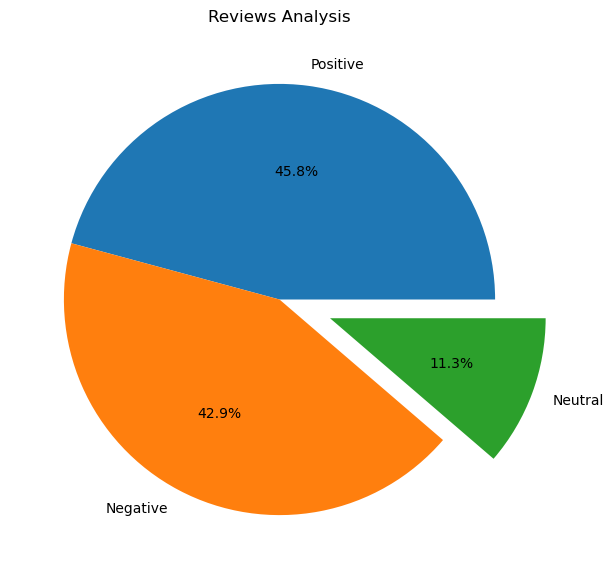

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [21]:
df.to_csv("BA_reviews.csv")

Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [24]:
!pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/299.9 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 3.7 MB/s eta 0:00:00


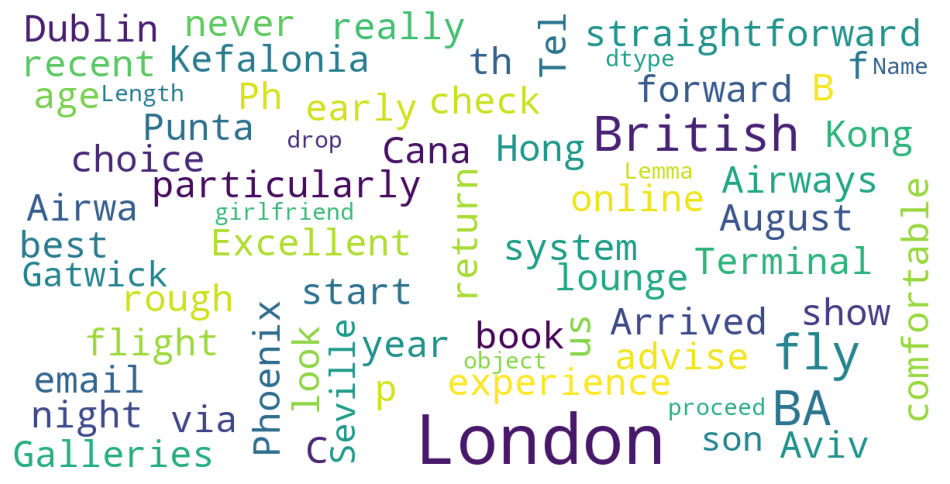

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud= WordCloud(
        background_color='white',stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    )
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)